# World Happiness Report: Gaining Insights on Happiness

## Exploratory Data Analysis
## Data Preparation/Feature Engineering


In [2]:

import pandas as pd

# Load the Happiness train dataset
file_path = '/Users/dianarodos/Documents/MS DS NWU/DL-422 Practical Machine Learning /Happiness/World-happiness-report-updated_2024.csv'
happiness_data = pd.read_csv(file_path, encoding='ISO-8859-1')

happiness_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [3]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [8]:
happiness_data.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [11]:
# Count the unique country values
unique_countries = happiness_data['Country name'].nunique()

print(f"The number of unique countries in the dataset is: {unique_countries}")

The number of unique countries in the dataset is: 165


In [13]:
#remove data output truncation
# Display all rows
pd.set_option('display.max_rows', None)

# Display all columns
pd.set_option('display.max_columns', None)

In [15]:
# Convert the 'year' column to numeric if it is not already
happiness_data['year'] = pd.to_numeric(happiness_data['year'], errors='coerce')
# Group by 'Country name' and get the maximum year for each country
max_year_per_country = happiness_data.groupby('Country name')['year'].max().reset_index()
max_year_per_country_sorted = max_year_per_country.sort_values(by='year', ascending=True)

print(max_year_per_country_sorted)


                  Country name  year
36                        Cuba  2006
58                      Guyana  2007
40                    Djibouti  2011
112                       Oman  2011
132          Somaliland region  2012
140                   Suriname  2012
3                       Angola  2014
139                      Sudan  2014
13                      Belize  2014
120                      Qatar  2015
143                      Syria  2015
15                      Bhutan  2015
131                    Somalia  2016
135                South Sudan  2017
149        Trinidad and Tobago  2017
26    Central African Republic  2017
91                    Maldives  2018
22                     Burundi  2018
59                       Haiti  2018
151               Turkmenistan  2019
123                     Rwanda  2019
11                     Belarus  2019
46                    Eswatini  2022
2                      Algeria  2022
61   Hong Kong S.A.R. of China  2022
83                     Lesotho  2022
7

In [18]:
#Make the dataframe with values with only the values for the latest year available

# Merge the original DataFrame with max_year_per_country to get only the latest year data
latest_year_df = pd.merge(happiness_data, max_year_per_country, on=['Country name', 'year'], how='inner')

#print(latest_year_df)

In [19]:
#Missing Values

# Check for missing values
missing_values = happiness_data.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(happiness_data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_df)


                                  Missing Values  Percentage
Country name                                   0    0.000000
year                                           0    0.000000
Life Ladder                                    0    0.000000
Log GDP per capita                            28    1.184934
Social support                                13    0.550148
Healthy life expectancy at birth              63    2.666102
Freedom to make life choices                  36    1.523487
Generosity                                    81    3.427846
Perceptions of corruption                    125    5.289886
Positive affect                               24    1.015658
Negative affect                               16    0.677105


In [27]:
import pandas as pd

# Function to fill missing values with the mean for each country
def fill_missing_values(df):
    # Step 1: Fill missing values with country mean
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            df[column] = df.groupby('Country name')[column].transform(lambda x: x.fillna(x.mean()))

    # Step 2: Fill remaining missing values with overall mean
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mean(), inplace=True)
    
    return df

happiness_data_filled = fill_missing_values(happiness_data)

missing_values_filled = happiness_data_filled.isnull().sum()
missing_percentage_filled = (missing_values_filled / len(happiness_data_filled)) * 100

missing_df_filled = pd.DataFrame({
    'Missing Values': missing_values_filled,
    'Percentage': missing_percentage_filled
})

print(missing_df_filled)


                                  Missing Values  Percentage
Country name                                   0         0.0
year                                           0         0.0
Life Ladder                                    0         0.0
Log GDP per capita                             0         0.0
Social support                                 0         0.0
Healthy life expectancy at birth               0         0.0
Freedom to make life choices                   0         0.0
Generosity                                     0         0.0
Perceptions of corruption                      0         0.0
Positive affect                                0         0.0
Negative affect                                0         0.0


/var/folders/3s/z2cgf_mn405_f5d7l899dcdm0000gn/T/ipykernel_44258/3950886933.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


# Visualizations

In [30]:
country_to_region = {
    'Afghanistan': 'South Asia',
    'Albania': 'Central and Eastern Europe',
    'Algeria': 'Middle East and North Africa',
    'Angola': 'Sub-Saharan Africa',
    'Argentina': 'Latin America and Caribbean',
    'Armenia': 'Central and Eastern Europe',
    'Australia': 'Western Europe',
    'Austria': 'Western Europe',
    'Azerbaijan': 'Central and Eastern Europe',
    'Bahrain': 'Middle East and North Africa',
    'Bangladesh': 'South Asia',
    'Belarus': 'Central and Eastern Europe',
    'Belgium': 'Western Europe',
    'Benin': 'Sub-Saharan Africa',
    'Bhutan': 'South Asia',
    'Bolivia': 'Latin America and Caribbean',
    'Bosnia and Herzegovina': 'Central and Eastern Europe',
    'Botswana': 'Sub-Saharan Africa',
    'Brazil': 'Latin America and Caribbean',
    'Bulgaria': 'Central and Eastern Europe',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cambodia': 'East Asia',
    'Cameroon': 'Sub-Saharan Africa',
    'Canada': 'North America',
    'Chad': 'Sub-Saharan Africa',
    'Chile': 'Latin America and Caribbean',
    'China': 'East Asia',
    'Colombia': 'Latin America and Caribbean',
    'Comoros': 'Sub-Saharan Africa',
    'Congo (Brazzaville)': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Costa Rica': 'Latin America and Caribbean',
    'Croatia': 'Central and Eastern Europe',
    'Cyprus': 'Western Europe',
    'Czech Republic': 'Central and Eastern Europe',
    'Denmark': 'Western Europe',
    'Djibouti': 'Sub-Saharan Africa',
    'Dominican Republic': 'Latin America and Caribbean',
    'Ecuador': 'Latin America and Caribbean',
    'Egypt': 'Middle East and North Africa',
    'El Salvador': 'Latin America and Caribbean',
    'Estonia': 'Central and Eastern Europe',
    'Eswatini': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Gabon': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Georgia': 'Central and Eastern Europe',
    'Germany': 'Western Europe',
    'Ghana': 'Sub-Saharan Africa',
    'Greece': 'Western Europe',
    'Guatemala': 'Latin America and Caribbean',
    'Guinea': 'Sub-Saharan Africa',
    'Haiti': 'Latin America and Caribbean',
    'Honduras': 'Latin America and Caribbean',
    'Hungary': 'Central and Eastern Europe',
    'Iceland': 'Western Europe',
    'India': 'South Asia',
    'Indonesia': 'Southeast Asia',
    'Iran': 'Middle East and North Africa',
    'Iraq': 'Middle East and North Africa',
    'Ireland': 'Western Europe',
    'Israel': 'Middle East and North Africa',
    'Italy': 'Western Europe',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Jamaica': 'Latin America and Caribbean',
    'Japan': 'East Asia',
    'Jordan': 'Middle East and North Africa',
    'Kazakhstan': 'Central Asia',
    'Kenya': 'Sub-Saharan Africa',
    'Kuwait': 'Middle East and North Africa',
    'Kyrgyzstan': 'Central Asia',
    'Laos': 'East Asia',
    'Latvia': 'Central and Eastern Europe',
    'Lebanon': 'Middle East and North Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Libya': 'Middle East and North Africa',
    'Lithuania': 'Central and Eastern Europe',
    'Luxembourg': 'Western Europe',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Malaysia': 'Southeast Asia',
    'Mali': 'Sub-Saharan Africa',
    'Malta': 'Western Europe',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mexico': 'Latin America and Caribbean',
    'Moldova': 'Central and Eastern Europe',
    'Mongolia': 'East Asia',
    'Montenegro': 'Central and Eastern Europe',
    'Morocco': 'Middle East and North Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Myanmar': 'Southeast Asia',
    'Namibia': 'Sub-Saharan Africa',
    'Nepal': 'South Asia',
    'Netherlands': 'Western Europe',
    'New Zealand': 'Western Europe',
    'Nicaragua': 'Latin America and Caribbean',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'North Macedonia': 'Central and Eastern Europe',
    'Norway': 'Western Europe',
    'Pakistan': 'South Asia',
    'Panama': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean',
    'Peru': 'Latin America and Caribbean',
    'Philippines': 'Southeast Asia',
    'Poland': 'Central and Eastern Europe',
    'Portugal': 'Western Europe',
    'Qatar': 'Middle East and North Africa',
    'Romania': 'Central and Eastern Europe',
    'Russia': 'Central and Eastern Europe',
    'Rwanda': 'Sub-Saharan Africa',
    'Saudi Arabia': 'Middle East and North Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Serbia': 'Central and Eastern Europe',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Singapore': 'Southeast Asia',
    'Slovakia': 'Central and Eastern Europe',
    'Slovenia': 'Central and Eastern Europe',
    'Somalia': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'South Korea': 'East Asia',
    'South Sudan': 'Sub-Saharan Africa',
    'Spain': 'Western Europe',
    'Sri Lanka': 'South Asia',
    'Sudan': 'Sub-Saharan Africa',
    'Suriname': 'Latin America and Caribbean',
    'Sweden': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Syria': 'Middle East and North Africa',
    'Tajikistan': 'Central Asia',
    'Tanzania': 'Sub-Saharan Africa',
    'Thailand': 'Southeast Asia',
    'Togo': 'Sub-Saharan Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Tunisia': 'Middle East and North Africa',
    'Turkey': 'Middle East and North Africa',
    'Turkmenistan': 'Central Asia',
    'Uganda': 'Sub-Saharan Africa',
    'Ukraine': 'Central and Eastern Europe',
    'United Arab Emirates': 'Middle East and North Africa',
    'United Kingdom': 'Western Europe',
    'United States': 'North America',
    'Uruguay': 'Latin America and Caribbean',
    'Uzbekistan': 'Central Asia',
    'Venezuela': 'Latin America and Caribbean',
    'Vietnam': 'Southeast Asia',
    'Yemen': 'Middle East and North Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
    'Belize': 'Latin America and Caribbean',
    'Central African Republic': 'Sub-Saharan Africa',
    'Cuba': 'Latin America and Caribbean',
    'Czechia': 'Central and Eastern Europe',
    'Guyana': 'Latin America and Caribbean',
    'Hong Kong S.A.R. of China': 'East Asia',
    'Kosovo': 'Central and Eastern Europe',
    'Maldives': 'South Asia',
    'Oman': 'Middle East and North Africa',
    'Somaliland region': 'Sub-Saharan Africa',
    'State of Palestine': 'Middle East and North Africa',
    'Taiwan Province of China': 'East Asia',
    'Türkiye': 'Middle East and North Africa'
}

# Map the country names to regions
happiness_data_filled['Regional indicator'] = happiness_data_filled['Country name'].map(country_to_region)

# Check if any country names are missing in the mapping
missing_countries = happiness_data_filled[happiness_data_filled['Regional indicator'].isna()]['Country name'].unique()
if len(missing_countries) > 0:
    print("The following countries are missing in the mapping:")
    print(missing_countries)
else:
    print("All countries are mapped successfully.")

print(happiness_data_filled.head())


All countries are mapped successfully.
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Posit

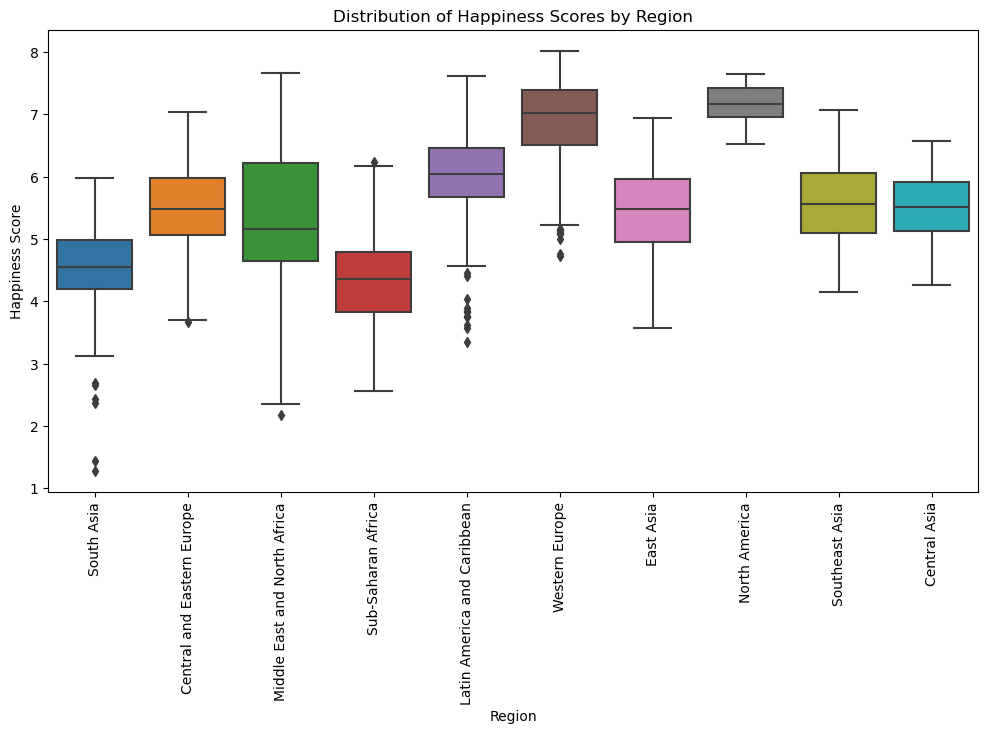

In [31]:
## Distribution of Happiness Score by Region


import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

sns.boxplot(x='Regional indicator', y='Life Ladder', data=happiness_data_filled)
plt.xticks(rotation=90)
plt.title('Distribution of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()


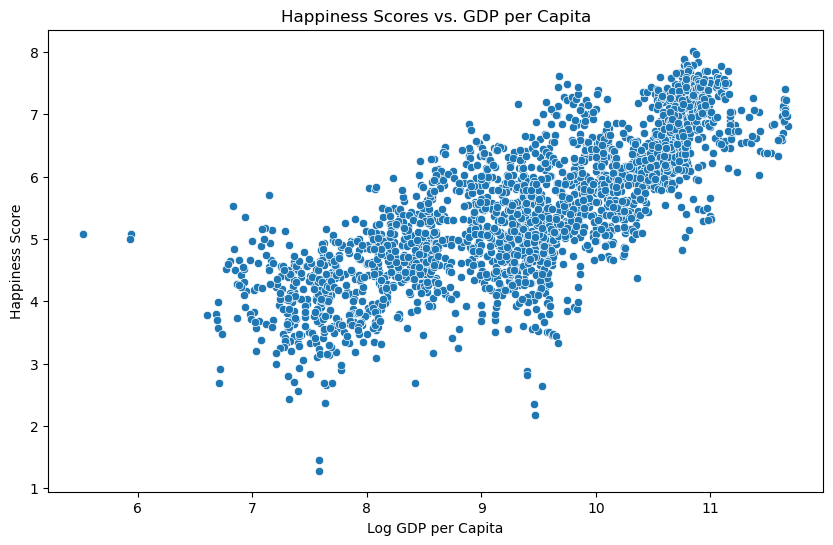

In [32]:
#Happiness scores vs. GDP per capita
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Log GDP per capita', y='Life Ladder', data=happiness_data_filled)
plt.title('Happiness Scores vs. GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


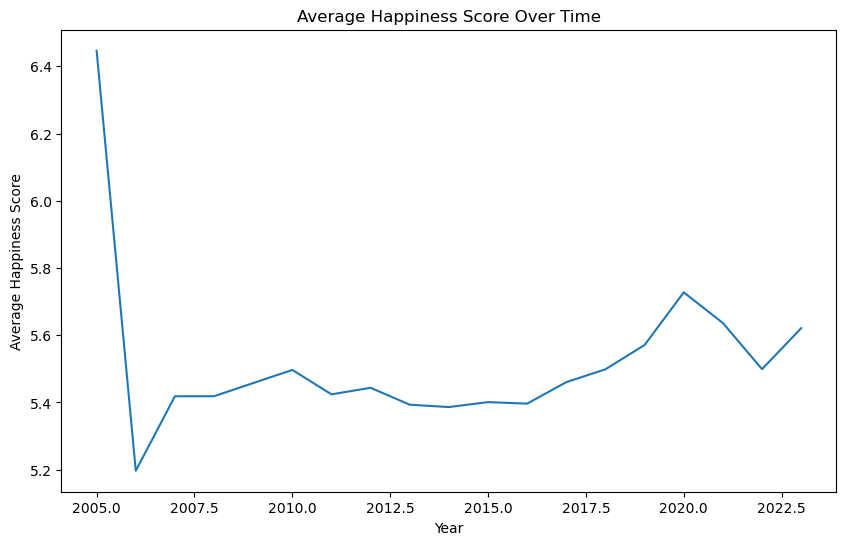

In [33]:
#Average Happiness Score Over Time

# Calculate the average happiness score for each year
avg_happiness_per_year = happiness_data_filled.groupby('year')['Life Ladder'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='Life Ladder', data=avg_happiness_per_year)
plt.title('Average Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.show()


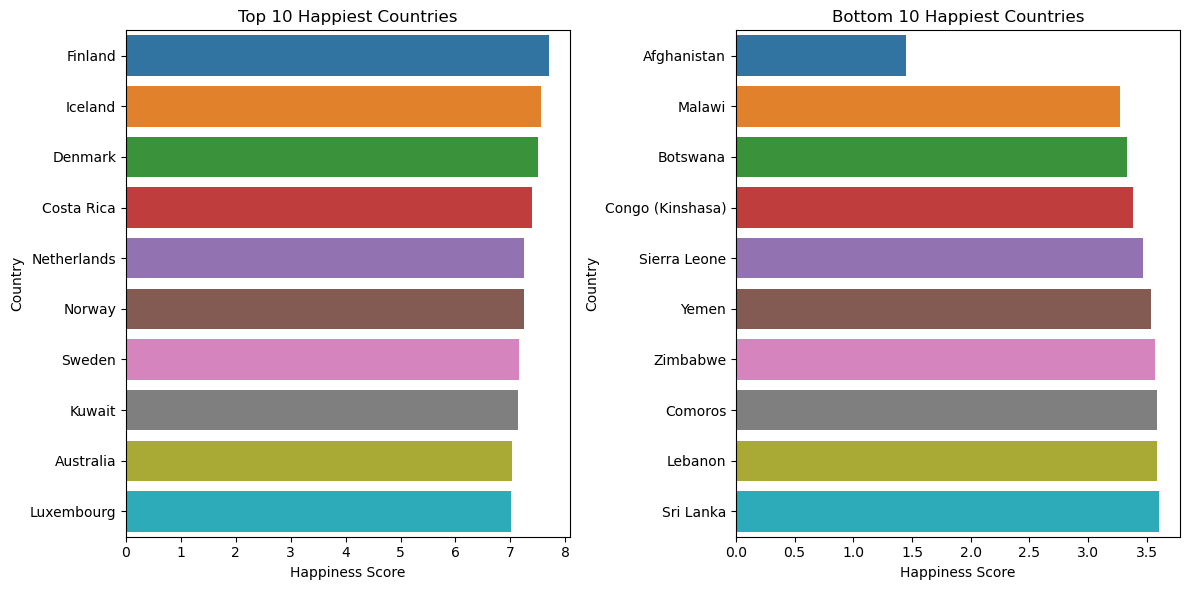

In [34]:
#Top and Bottom 10 Countries by Happiness Score

# Get the latest year data
latest_year = happiness_data_filled['year'].max()
latest_data = happiness_data_filled[happiness_data_filled['year'] == latest_year]

# Top 10 countries
top_10_countries = latest_data.nlargest(10, 'Life Ladder')

# Bottom 10 countries
bottom_10_countries = latest_data.nsmallest(10, 'Life Ladder')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Life Ladder', y='Country name', data=top_10_countries)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='Life Ladder', y='Country name', data=bottom_10_countries)
plt.title('Bottom 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


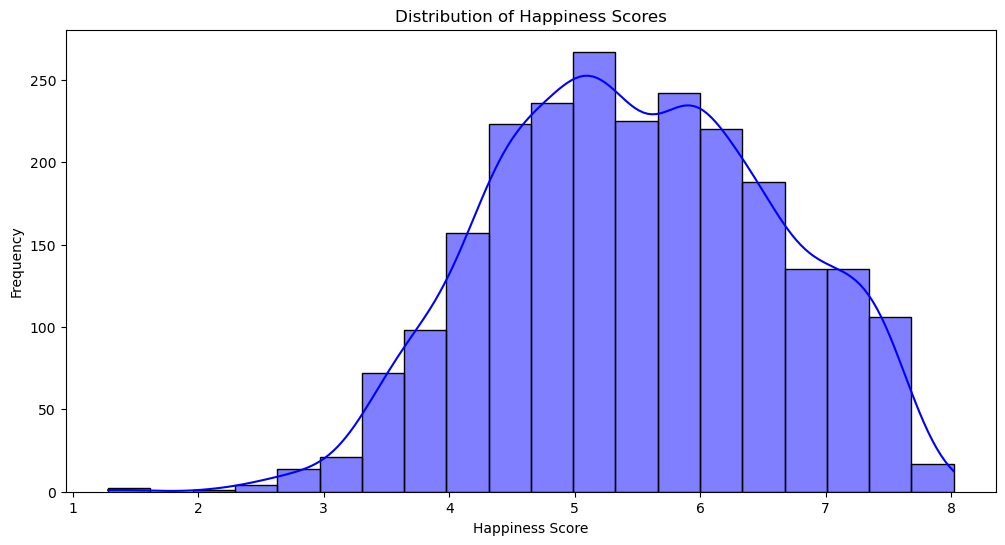

In [35]:
# Distribution of Happiness Scores
plt.figure(figsize=(12, 6))
sns.histplot(happiness_data_filled['Life Ladder'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a len

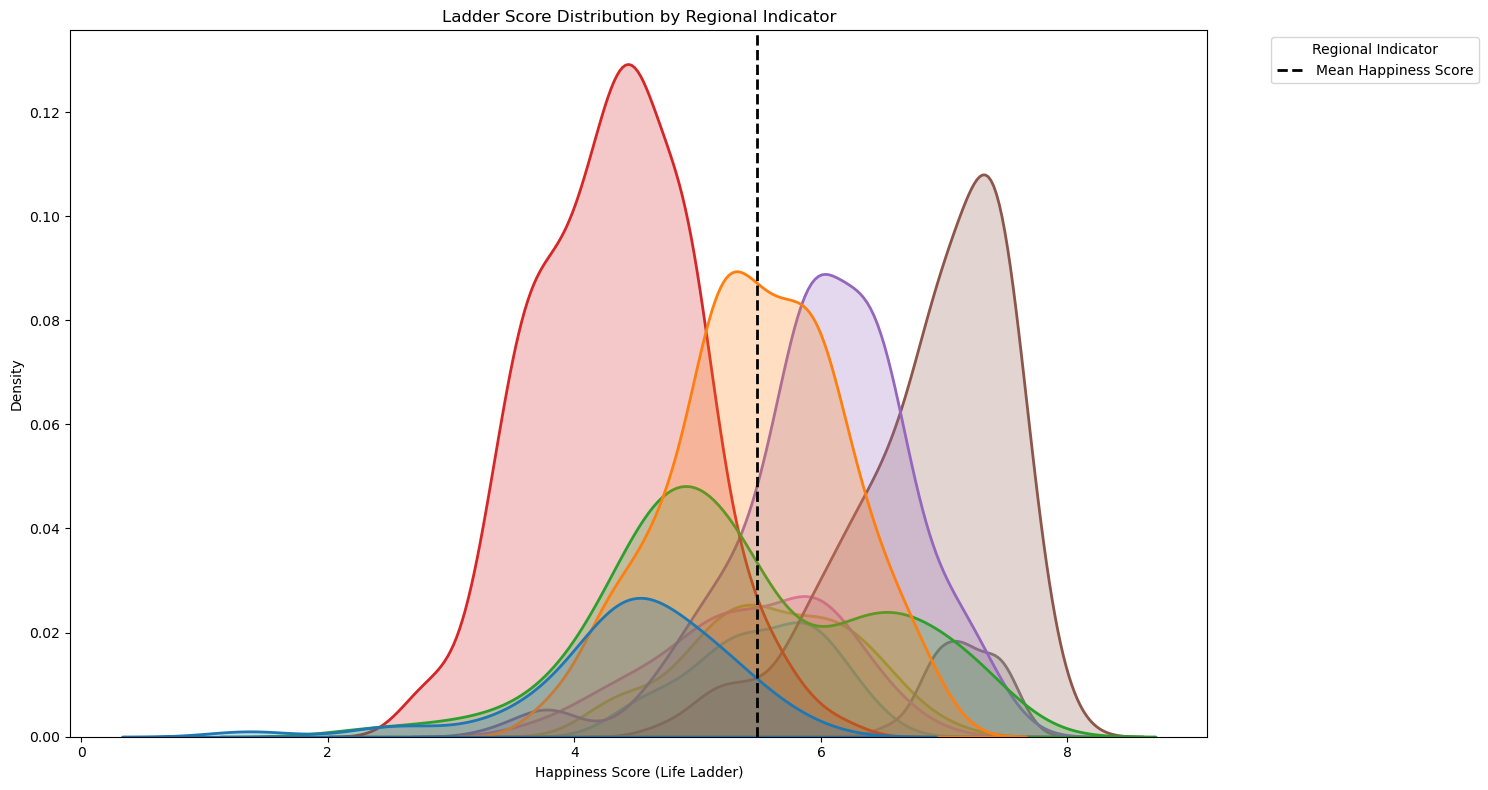

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Replace infinite values with NaN
happiness_data_filled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Distribution of Happiness Score by Region
plt.figure(figsize=(15, 8))
sns.kdeplot(
    x=happiness_data_filled['Life Ladder'], 
    hue=happiness_data_filled['Regional indicator'], 
    fill=True, 
    linewidth=2,
    palette="tab10"  # Added color palette for distinct colors
)
plt.axvline(happiness_data_filled['Life Ladder'].mean(), color='black', linestyle='--', linewidth=2, label='Mean Happiness Score')
plt.title('Ladder Score Distribution by Regional Indicator')
plt.xlabel('Happiness Score (Life Ladder)')
plt.ylabel('Density')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')  # Explicit legend positioning
plt.tight_layout()
plt.show()


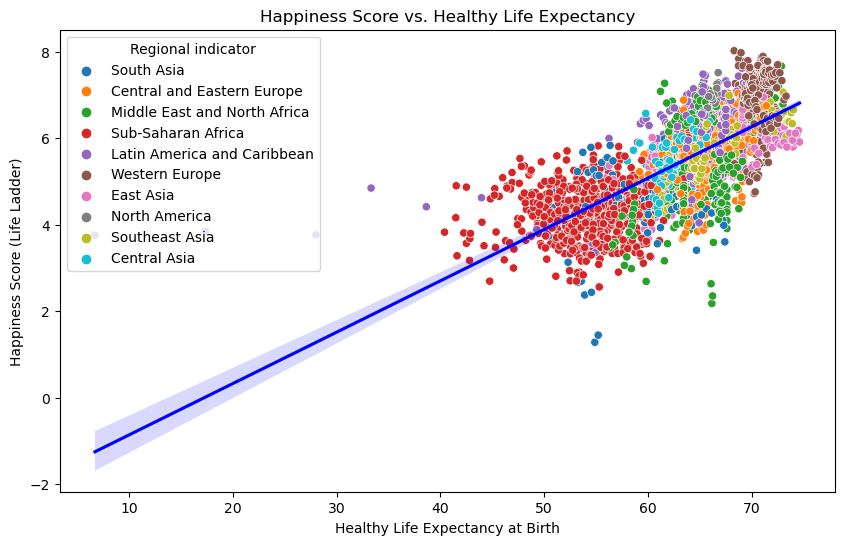

In [45]:
# Happiness Score vs. Healthy Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthy life expectancy at birth', y='Life Ladder', hue='Regional indicator', data=happiness_data_filled, palette='tab10')
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=happiness_data_filled, scatter=False, color='blue')
plt.title('Happiness Score vs. Healthy Life Expectancy')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Happiness Score (Life Ladder)')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

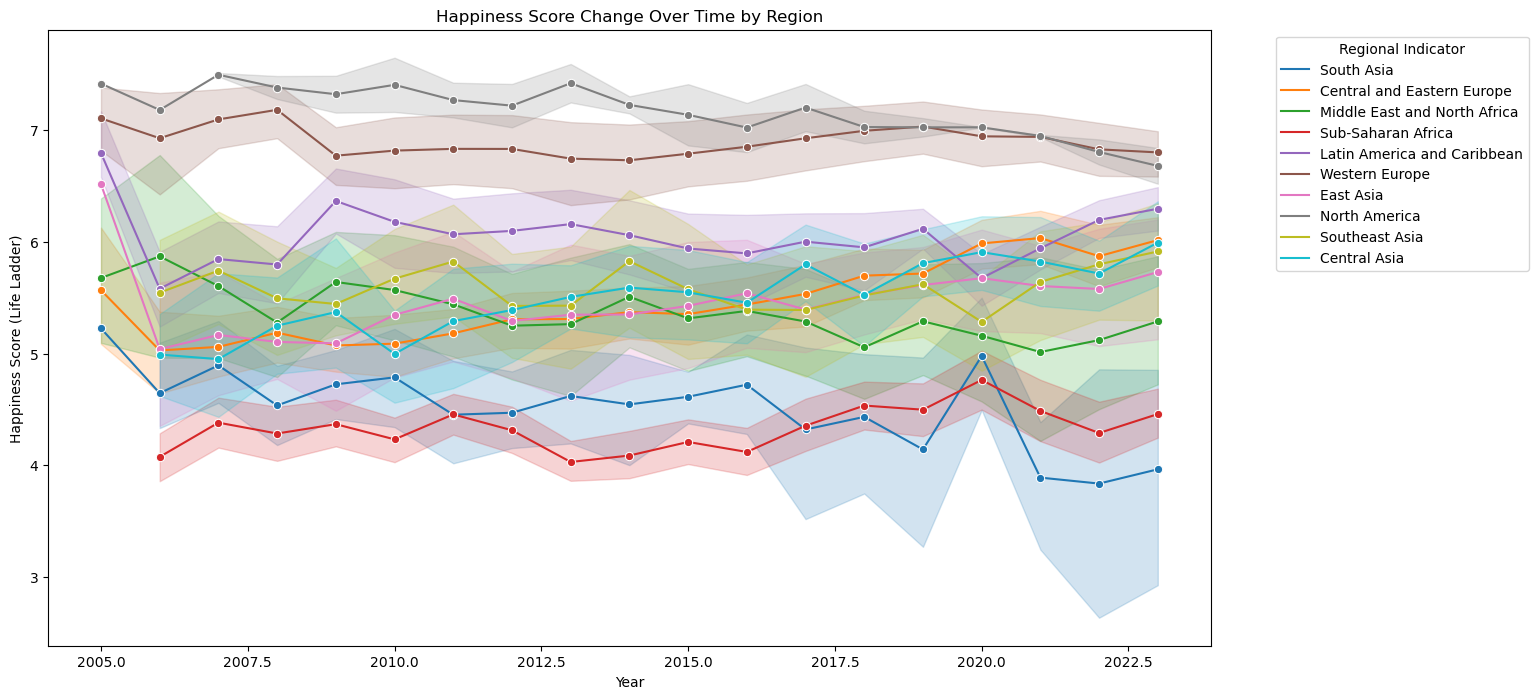

In [46]:
# Happiness Score Change Over Time for Each Region
plt.figure(figsize=(15, 8))
sns.lineplot(x='year', y='Life Ladder', hue='Regional indicator', data=happiness_data_filled, marker='o')
plt.title('Happiness Score Change Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Correlation Coefficients with 'Life Ladder':
Life Ladder                         1.000000
Log GDP per capita                  0.781101
Social support                      0.722851
Healthy life expectancy at birth    0.713407
Freedom to make life choices        0.533148
Positive affect                     0.514638
Generosity                          0.177732
Negative affect                    -0.352237
Perceptions of corruption          -0.444914
Name: Life Ladder, dtype: float64


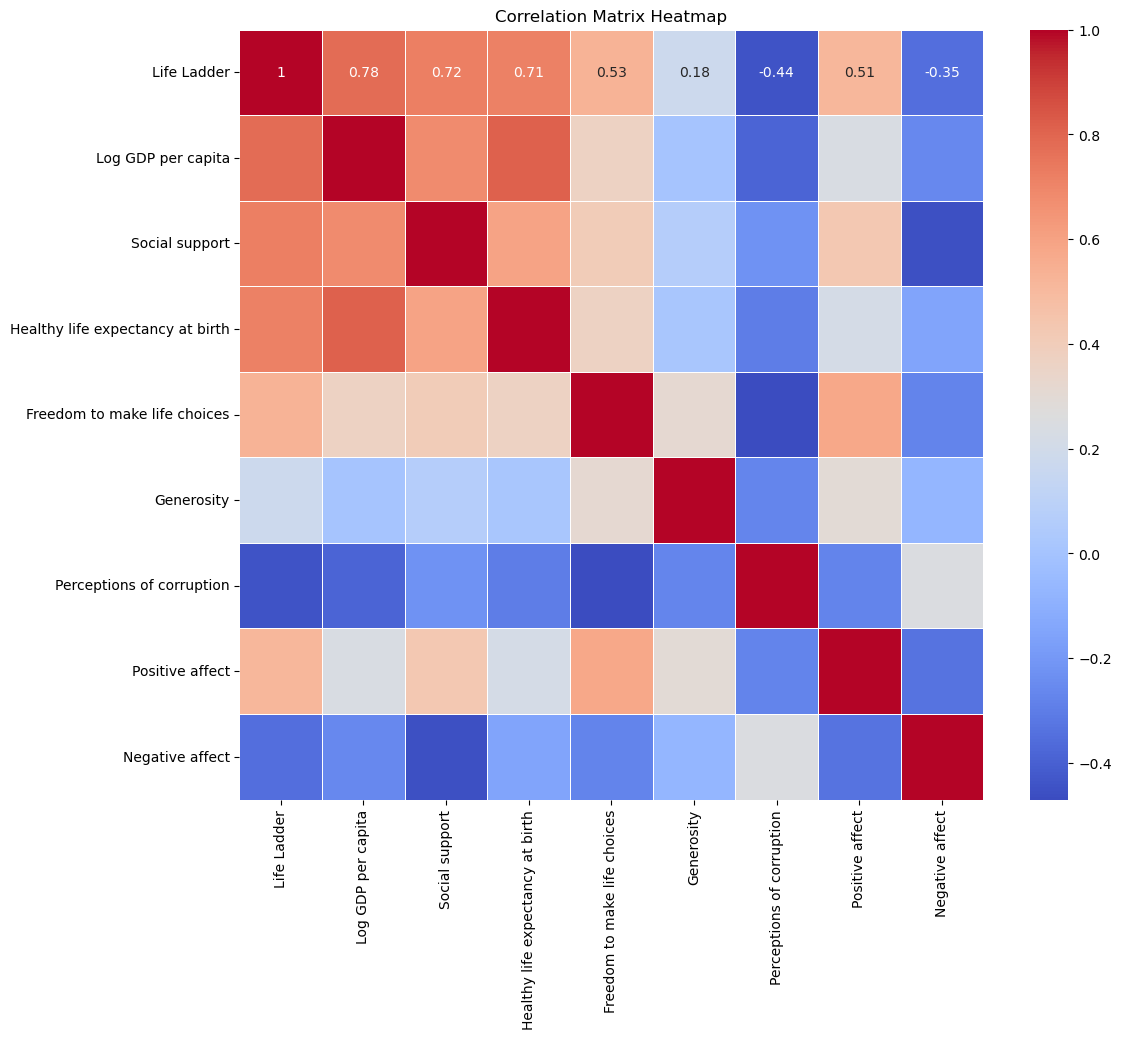

In [50]:
happiness_data_filtered = happiness_data_filled.drop(['Country name', 'year','Regional indicator'], axis=1)

# Calculate the correlation matrix
correlation_matrix = happiness_data_filtered.corr()

# Extract correlation coefficients for 'Life Ladder'
life_ladder_correlations = correlation_matrix['Life Ladder'].sort_values(ascending=False)
print("Correlation Coefficients with 'Life Ladder':")
print(life_ladder_correlations)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Feature Engineering 

In [51]:
#Lets create a composite "well-being index" by combining 
#Log GDP per capita
#Social support
#Healthy life expectancy at birth
#Freedom to make life choices

#First let's scale them to the scale of 0 to 1 and then combine them

from sklearn.preprocessing import MinMaxScaler

# Select the features for the Well-being Index
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices']

# Normalize the features
scaler = MinMaxScaler()
happiness_data_filled[features] = scaler.fit_transform(happiness_data_filled[features])

# Calculate the Well-being Index
happiness_data_filled['Well-being Index'] = happiness_data_filled[features].mean(axis=1)

print(happiness_data_filled[['Country name', 'Well-being Index']].head())



  Country name  Well-being Index
0  Afghanistan          0.470633
1  Afghanistan          0.498590
2  Afghanistan          0.473592
3  Afghanistan          0.433080
4  Afghanistan          0.448997


/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [53]:
happiness_data_filled.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Well-being Index
0,Afghanistan,2008,3.724,0.296471,0.293808,0.644962,0.647292,0.164,0.882,0.414,0.258,South Asia,0.470633
1,Afghanistan,2009,4.402,0.322329,0.426877,0.649381,0.595773,0.187,0.850,0.481,0.237,South Asia,0.498590
2,Afghanistan,2010,4.758,0.339405,0.409750,0.653801,0.491413,0.118,0.707,0.517,0.275,South Asia,0.473592
3,Afghanistan,2011,3.832,0.334038,0.386034,0.658220,0.354029,0.160,0.731,0.480,0.267,South Asia,0.433080
4,Afghanistan,2012,3.783,0.347048,0.386034,0.662640,0.400264,0.234,0.776,0.614,0.268,South Asia,0.448997


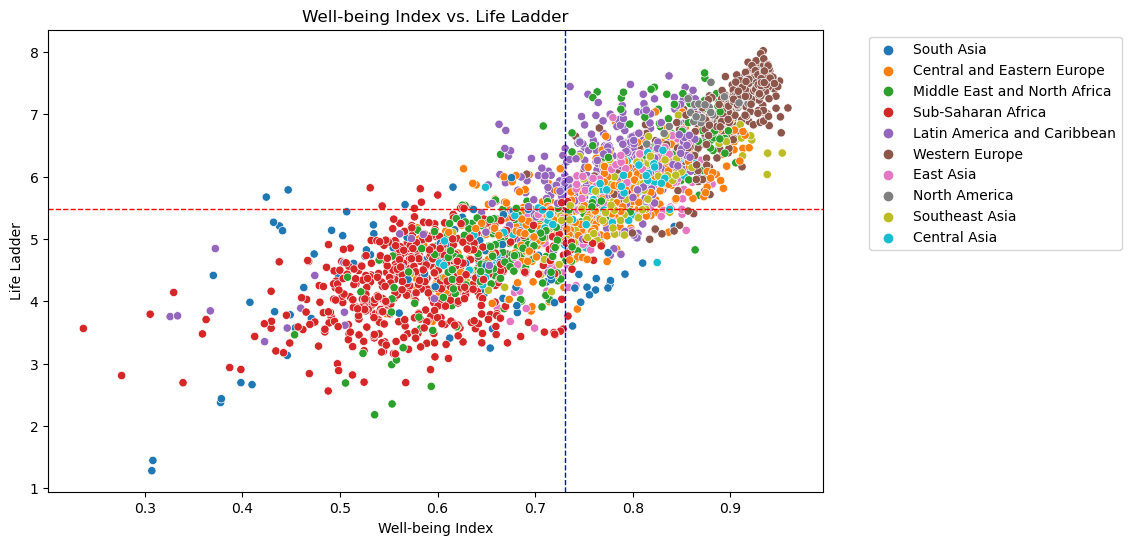

In [54]:
#Scatter Plot of Well-being Index vs. Life Ladder

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Well-being Index', y='Life Ladder', hue='Regional indicator', data=happiness_data_filled, palette='tab10')
plt.title('Well-being Index vs. Life Ladder')
plt.axhline(happiness_data_filled['Life Ladder'].mean(), color='r', linestyle='--', linewidth=1)
plt.axvline(happiness_data_filled['Well-being Index'].mean(), color='b', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

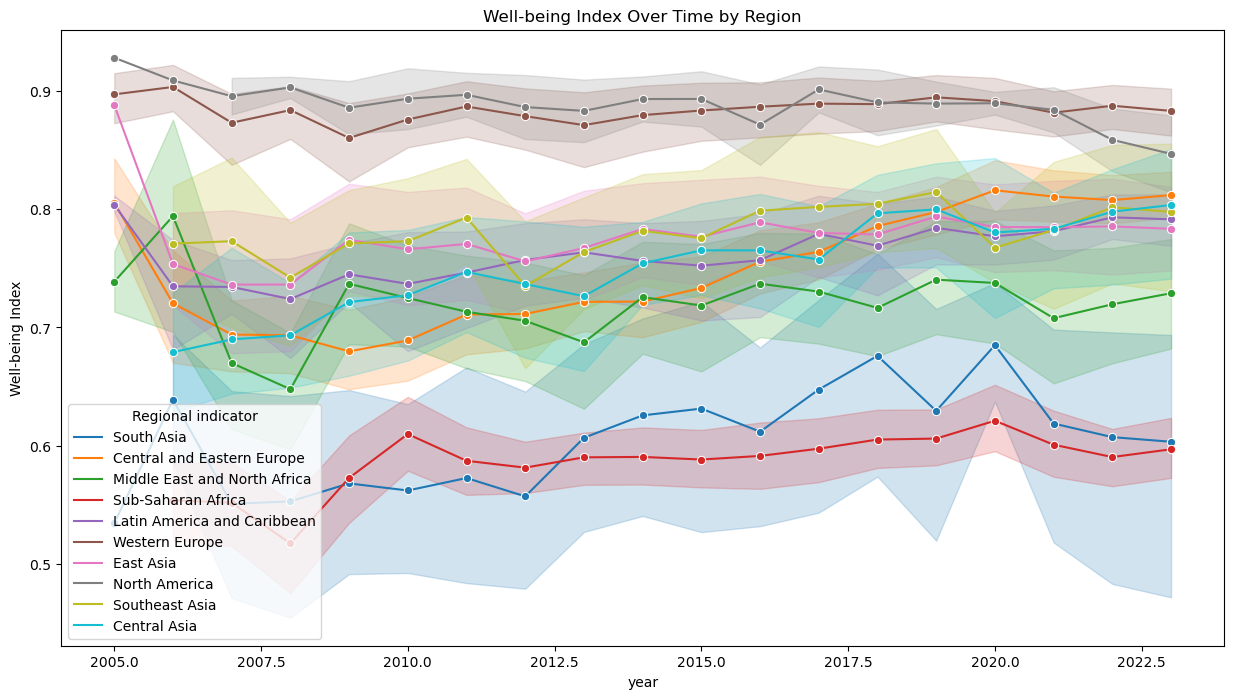

In [55]:
#Time Series Plot of Well-being Index Over the Years

plt.figure(figsize=(15, 8))
sns.lineplot(x='year', y='Well-being Index', hue='Regional indicator', data=happiness_data_filled, marker='o')
plt.title('Well-being Index Over Time by Region')
plt.show()


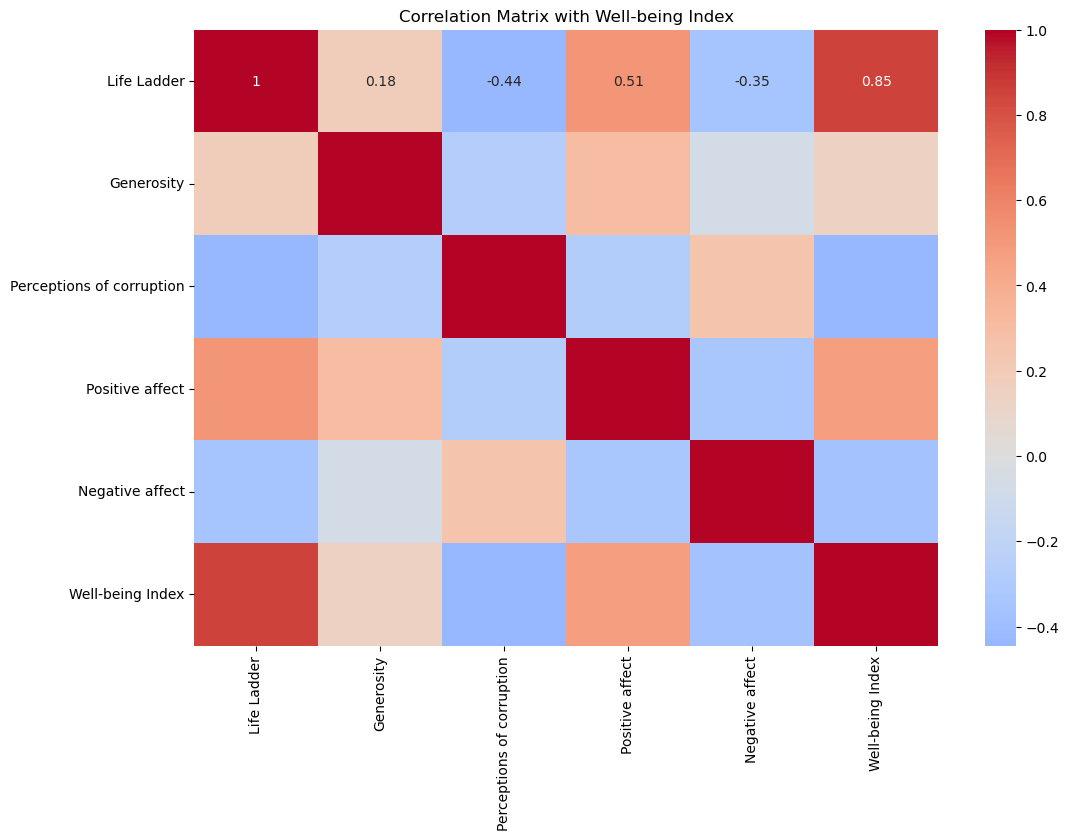

Correlation Coefficients with 'Life Ladder':
Life Ladder                  1.000000
Well-being Index             0.850729
Positive affect              0.514638
Generosity                   0.177732
Negative affect             -0.352237
Perceptions of corruption   -0.444914
Name: Life Ladder, dtype: float64


In [60]:


# Calculate the correlation matrix including the Well-being Index
correlation_matrix_wellbeing = happiness_data_filled.drop(columns=['Country name', 'year', 'Regional indicator','Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_wellbeing, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Well-being Index')
plt.show()

# Extract correlation coefficients for 'Life Ladder'
life_ladder_correlations_well = correlation_matrix_wellbeing['Life Ladder'].sort_values(ascending=False)
print("Correlation Coefficients with 'Life Ladder':")
print(life_ladder_correlations_well)


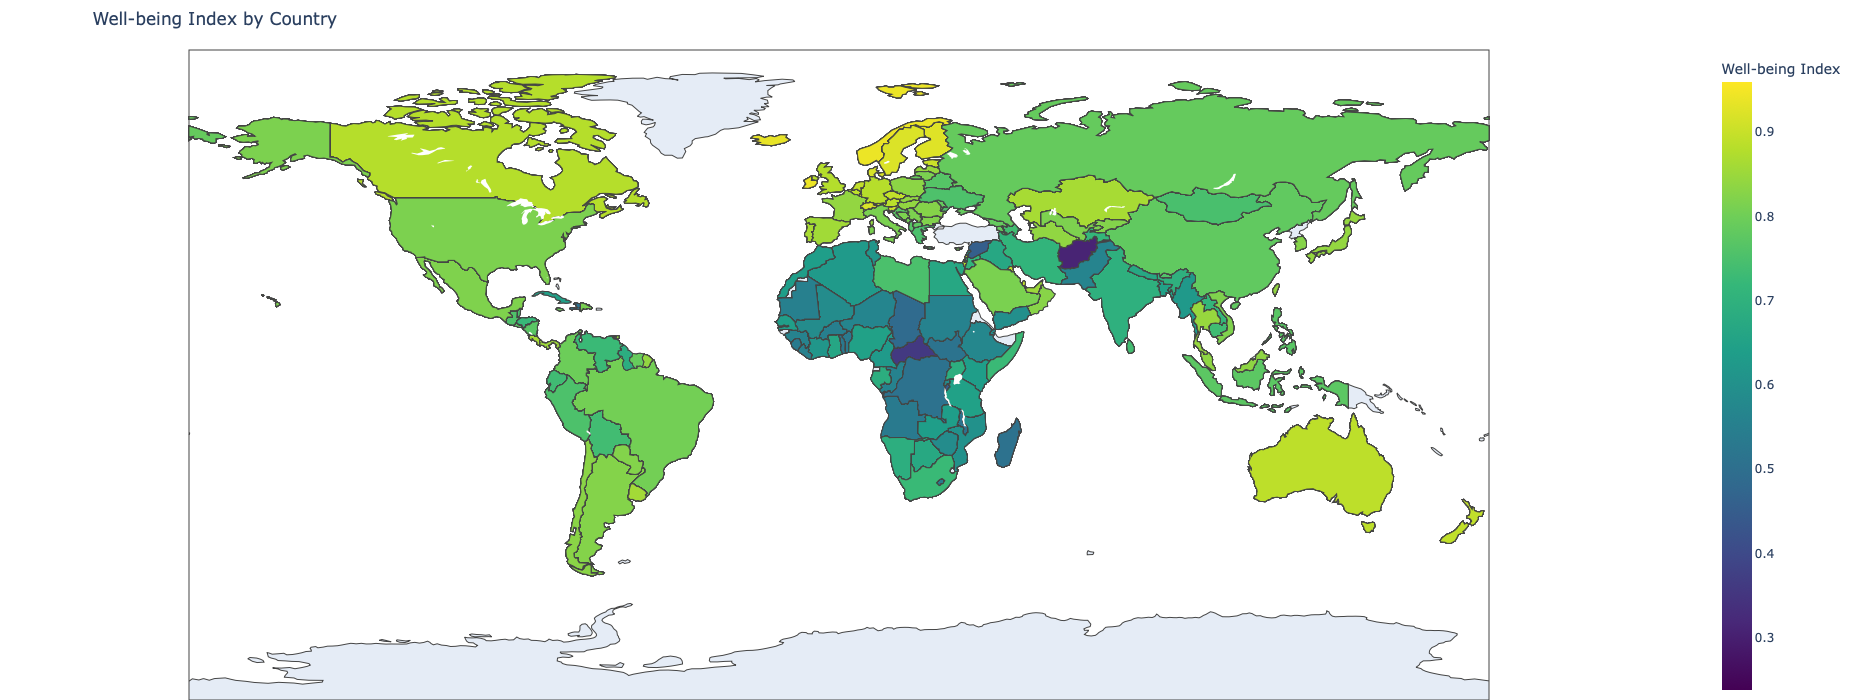

In [63]:
import plotly.express as px
import pandas as pd

happiness_data_filled['Country'] = happiness_data_filled['Country name']

# Create the map visualization
fig = px.choropleth(
    happiness_data_filled,
    locations='Country',
    locationmode='country names',
    color='Well-being Index',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Viridis,  # Change color scheme here
    title='Well-being Index by Country'
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()
